In [2]:
import os # allow changing, and navigating files and folders, 
import sys
import re # module to use regular expressions, 
import glob # lists names in folders that match Unix shell patterns
import random # functions that use and generate random numbers

import pickle
import warnings
import numpy as np # support for multi-dimensional arrays and matrices
import pandas as pd # library for data manipulation and analysis
import seaborn as sns # advance plots, for statistics, 
import matplotlib as mpl # to get some basif functions, heping with plot mnaking 
import matplotlib.pyplot as plt # for making plots, 

In [3]:
os.chdir(basedir)
sys.path.append(basedir)

# my tools, loaded only form basedir, 
from src.utils.data_loaders import load_encoded_imgbatch_using_logfile, load_raw_img_batch, load_raw_img_batch_with_custom_datagen, cnn_data_loader
from src.utils.example_plots_after_clustering import plot_img_examples, create_spaces_between_img_clusters, plot_img_examples_from_dendrogram
from src.utils.annotated_pie_charts import annotated_pie_chart_with_class_and_group, prepare_img_classname_and_groupname
from src.utils.tools_for_plots import create_class_colors_dict
from src.utils.feature_extraction_tools import encode_images, create_augmented_images
from src.utils.logreg_tools import my_logredCV, plot_examples_with_predictions_and_proba, plot_examples_with_predictions_and_proba_gamma
from src.utils.random_forest import random_forest_grid_search, plot_random_tree_summary_andor_table
from src.utils.model_summary_plots import plot_grid_acc_and_return_summary_df, visual_model_summary
from src.utils.SVM_tools import SVM_grid_search, plot_grid_acc_and_return_summary_df
from src.utils.tools_for_plots import create_class_colors_dict
from src.utils.model_summary_plots import plot_grid_acc_and_return_summary_df, visual_model_summary, model_gridsearch_summary_plots
from src.utils.knn_tools import knn_grid_search
from src.utils.dense_networks_tools import create_keras_one_layer_dense_model, create_keras_two_layer_dense_model, denseNN_grid_search, plot_NN_loss_acc
from src.utils.example_plots import plot_example_images_with_datagenerator
from src.utils.cnn_tools import plot_NN_loss_acc, create_convNN, cnn_gridSearch
from src.utils.cnn_augmented_images_tools import plot_NN_loss_acc, cnn_model_for_unit_test, basic_cnn_model_with_two_layers, basic_cnn_model_with_two_layers
from src.utils.cnn_augmented_images_tools import cnn_gridSearch_customDataLoader

# Test different method for image augmentation

Found 280 images belonging to 6 classes.


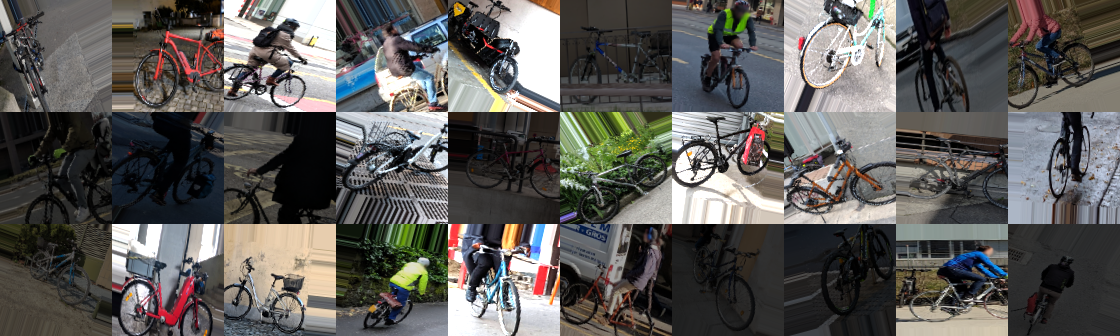

In [6]:
# set image size for plotting examples, 
img_size=(112, 112) # just for test, 

# evaluate parameters used for image augmentation, 
ImageDataGenerator_kwargs_v1 = dict(
    height_shift_range=0.2,
    width_shift_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    rotation_range=30,
    brightness_range=[0.2,1.8], 
    zoom_range=[0.75,1.25], # ±25%
    channel_shift_range=.5
) # V1 was getting bettwer results, thus it was used later on for developing cnn models, 

# create data generator,
datagen = ImageDataGenerator(rescale=1/255, **ImageDataGenerator_kwargs_v1)  

# create iterator,
datagen_iter = datagen.flow_from_directory(
                        os.path.join(PATH_raw, train_subset_names[0]), 
                        batch_size=10, 
                        target_size=img_size,
                        shuffle=False)
plot_example_images_with_datagenerator(
            generator=datagen_iter,
            n_batches=3,
            image_dim=img_size)

# grid search over cnn networks with different parameters, 

small_resolution_augmented_images_BIG_DATASETS_TWO//0//1of1 --- 2020-11-23 11:38:05.452500
grid analysis
Found 280 images belonging to 6 classes.
Found 280 images belonging to 6 classes.
ADDING batch: train * 1, batch_arr: (280, 112, 112, 3), labels: (280, 7)
------------->>>: final batch_arr: (280, 112, 112, 3), labels: (280, 7)
ADDING batch: train * 2, batch_arr: (280, 112, 112, 3), labels: (280, 7)
------------->>>: final batch_arr: (560, 112, 112, 3), labels: (560, 7)
ADDING batch: train * 3, batch_arr: (280, 112, 112, 3), labels: (280, 7)
------------->>>: final batch_arr: (840, 112, 112, 3), labels: (840, 7)
ADDING batch: train * 4, batch_arr: (280, 112, 112, 3), labels: (280, 7)
------------->>>: final batch_arr: (1120, 112, 112, 3), labels: (1120, 7)
ADDING batch: train * 5, batch_arr: (280, 112, 112, 3), labels: (280, 7)
------------->>>: final batch_arr: (1400, 112, 112, 3), labels: (1400, 7)
ADDING batch: train * 6, batch_arr: (280, 112, 112, 3), labels: (280, 7)
-----------

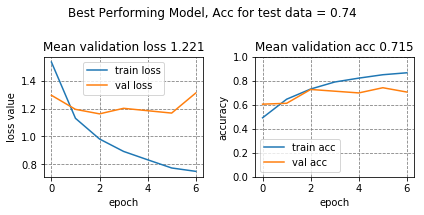

Found 50 images belonging to 6 classes.


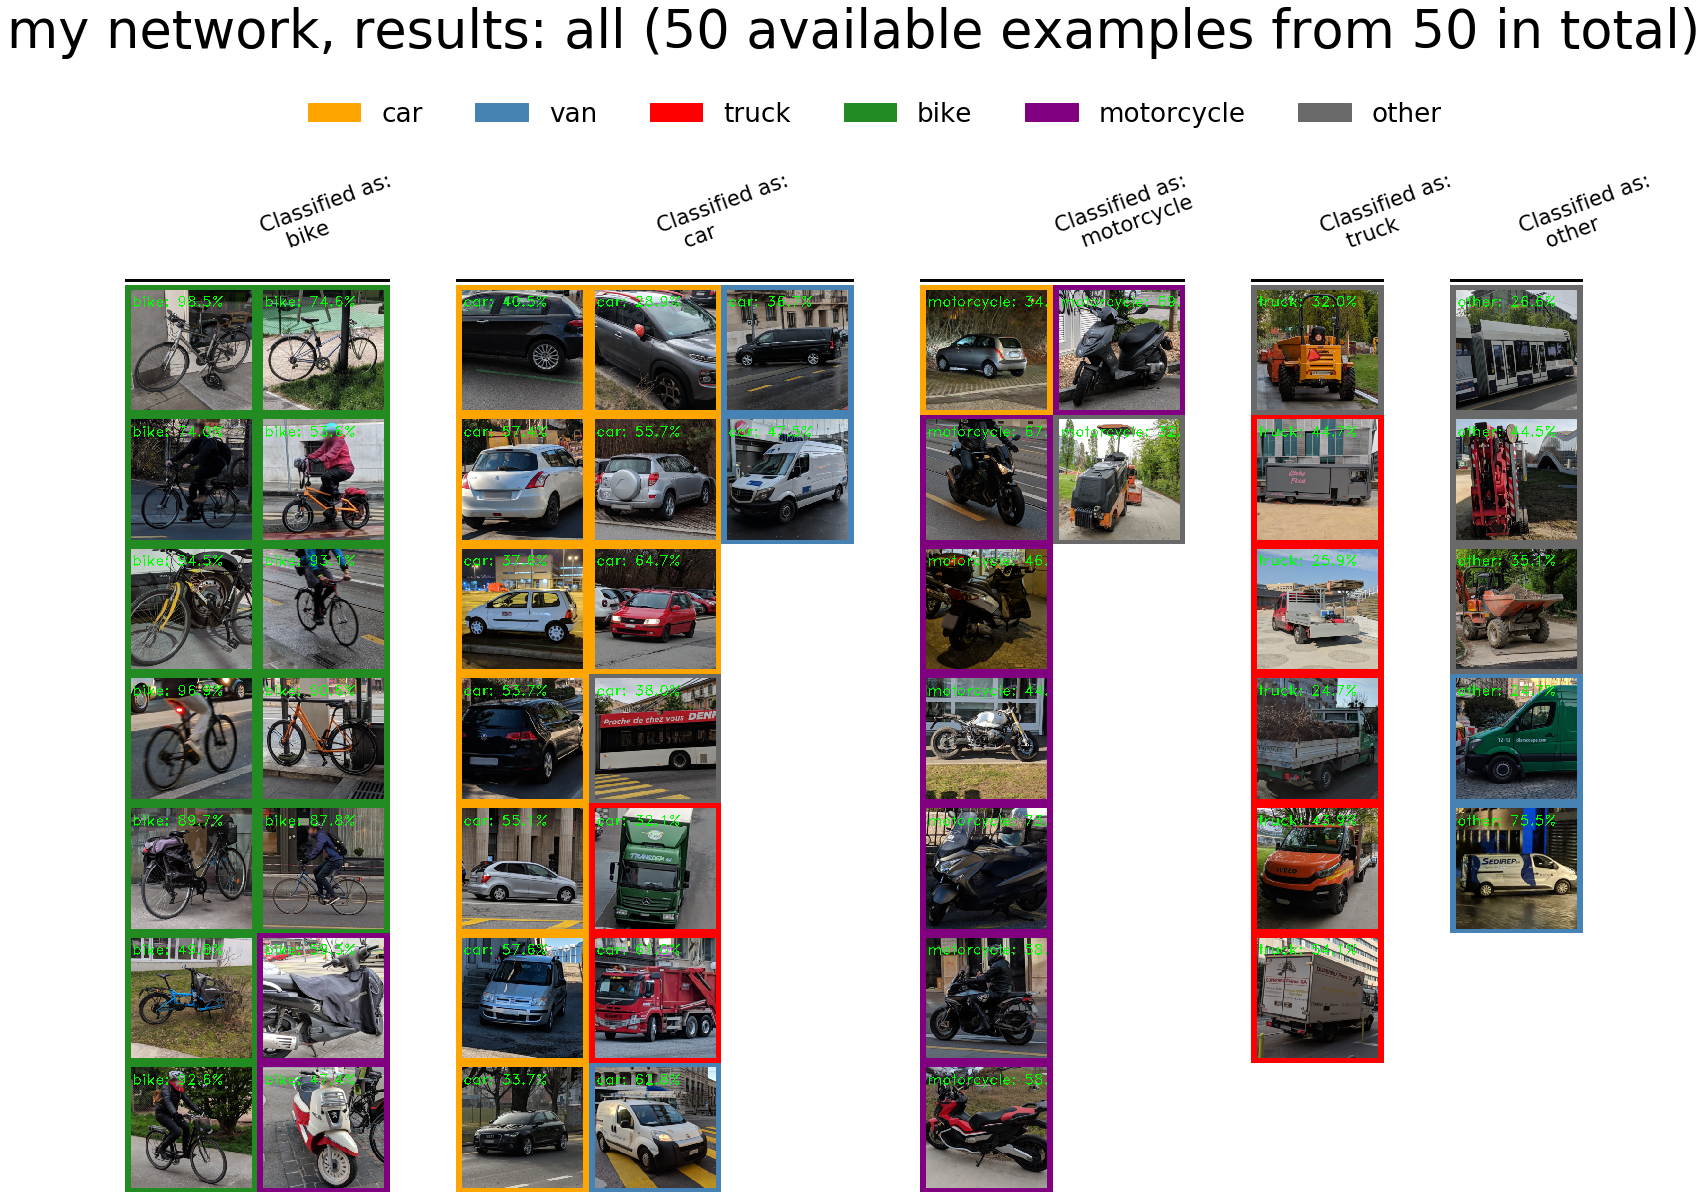

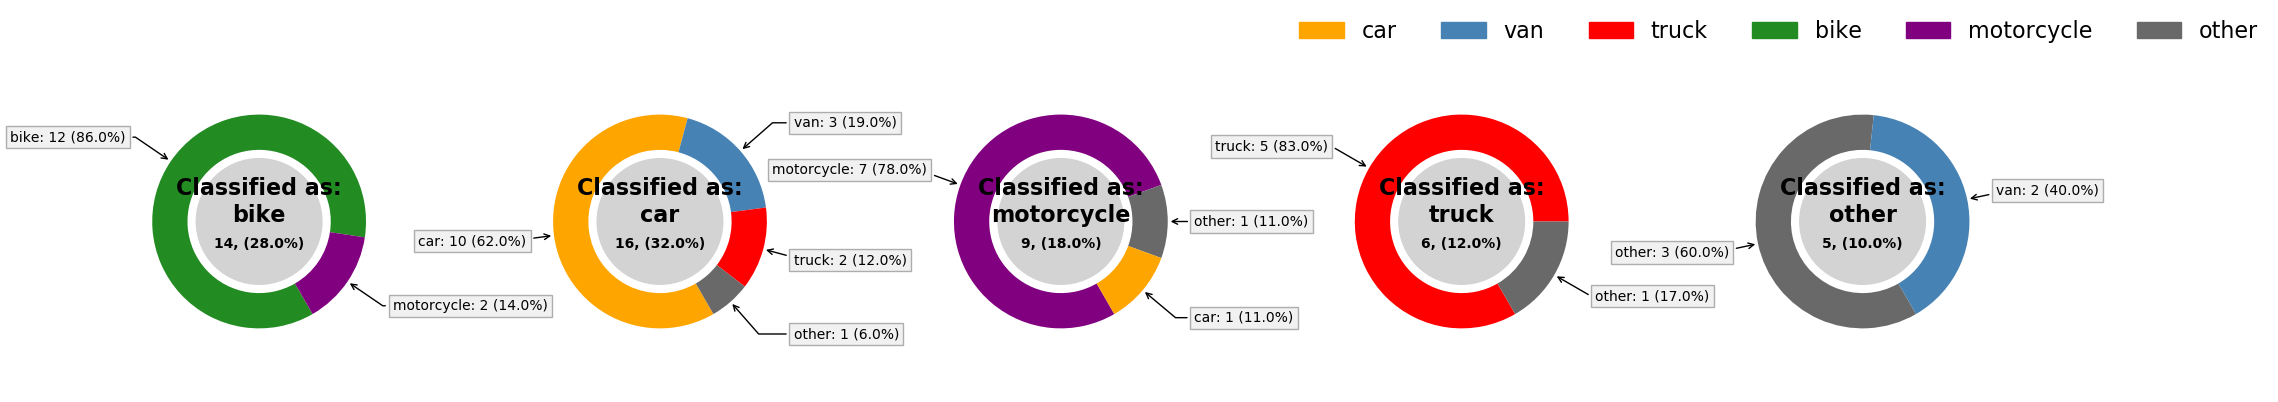

DONE ...


In [8]:
# .. how to load and prepare the data, 
data_loader_params = {
    "img_size": None, # from main params, 
    "train_test_split__train_size": 0.7, # used only if valid_subset_names==None, otherwise I usse the test and valid datassets prepared before, 
    "img_generator":{
        "n_next_datagen": 80, # 20x augmented variants is made form each image, 
        "shuffle_all": True,  # images are mixed between batches,  
        "ImageDataGenerator_kwargs": ImageDataGenerator_kwargs, 
        }
    }

# models applied,
model_params_1 = {
    "optimizer": "Adam", 
    "dense_one__units" : 360,    # unit nr in the first dense layer, 
    "EarlyStopping__patience": 4,
    "fit__batch_size": 32,
    "fit__epochs": 100,
    "fit__shuffle": True}
model_params_2 = {
    "optimizer": "Adam", 
    "dense_one__units" : 360,    # unit nr in the first dense layer, 
    "EarlyStopping__patience": 4,
    "fit__batch_size": 64,
    "fit__epochs": 100,
    "fit__shuffle": True}
model_params_3 = {
    "optimizer": "Adam", 
    "dense_one__units" : 360,    # unit nr in the first dense layer, 
    "EarlyStopping__patience": 4,
    "fit__batch_size": 128,
    "fit__epochs": 100,
    "fit__shuffle": True}

# grid search parameters, 
grid = ParameterGrid({
    "img_size"      : [(112, 112)],   # I will compared NN with low and high resolution images, 
    "random_state_nr" : [0], 
    "data_loader_params" : [data_loader_params], 
    "model_params" : [model_params_2], 
    })


# ...................................................................................................................................................
#  grid search,     
dt_results_list, model_predictions_dict, model_history_dict = cnn_gridSearch_customDataLoader(    
    model = "cnn_two_layers",
    method_name = task_name,
    module_name =module_name,
    dataset_name=dataset_name,
    class_colors=class_colors,
    grid=grid,
    # ...
    train_subset_names=train_subset_names,
    valid_subset_names=valid_subset_names,
    test_subset_names=test_subset_names,     
    PATH_raw=PATH_raw,
    # ...
    augment_valid_data = False,  
    store_predictions=True,
    # ...
    model_unit_test = False, # train dat are used as validation and test subsets, all corresponding params are ignored,
    # ...
    verbose=True,
    track_progres=True,
    model_fit__verbose=1,    
    plot_history=True # applied only if verbose==True,
)       